In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import string
import warnings
warnings.filterwarnings('ignore')


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Dataset Creation

In [4]:
#Create a synthetic dataset with sample essays using Llm
print("Creating synthetic dataset with sample essays...")

# Function to generate essays of different complexity and quality
def generate_sample_essay(topic, quality_level):
    """
    Generate a sample essay on a topic with varying quality based on quality_level
    quality_level ranges from 1 (poor) to 5 (excellent)
    """
    # Dictionary of topics with related keywords
    topic_keywords = {
        'education': ['learning', 'knowledge', 'students', 'schools', 'teachers', 'curriculum', 
                     'academic', 'classroom', 'development', 'literacy', 'instruction'],
        'technology': ['innovation', 'digital', 'computers', 'internet', 'automation', 'software', 
                      'devices', 'advancement', 'connectivity', 'artificial intelligence', 'data'],
        'environment': ['climate', 'sustainability', 'conservation', 'ecosystem', 'pollution', 
                       'biodiversity', 'resources', 'renewable', 'protection', 'green', 'natural'],
        'healthcare': ['medical', 'patients', 'doctors', 'treatment', 'disease', 'wellness', 
                      'hospitals', 'medicine', 'prevention', 'diagnosis', 'care'],
        'society': ['community', 'culture', 'individuals', 'relationships', 'norms', 
                   'values', 'behavior', 'interactions', 'traditions', 'institutions', 'groups']
    }
    
    # Essay structure templates with varying complexity based on quality
    intro_templates = [
        # Quality level 1 (poor)
        f"I think {topic} is important. There are many aspects of {topic} today.",
        
        # Quality level 2 (below average)
        f"The topic of {topic} has several points to consider. I will discuss some ideas about {topic}.",
        
        # Quality level 3 (average)
        f"{topic.capitalize()} is a significant subject in our modern world. There are multiple facets of {topic} that warrant discussion.",
        
        # Quality level 4 (good)
        f"In contemporary society, {topic} represents a crucial domain that merits thorough examination. The complexities of {topic} encompass various dimensions that influence our daily lives.",
        
        # Quality level 5 (excellent)
        f"The multifaceted nature of {topic} presents a compelling area of inquiry that continues to evolve in response to societal changes. An analysis of {topic} reveals intricate connections between theoretical frameworks and practical applications that shape our understanding of this essential domain."
    ]
    
    # Body paragraph templates with varying complexity
    body_templates = [
        # Quality level 1 (poor)
        f"There are some issues with {topic}. Some people like it and some don't. It can be good or bad depending on what happens.",
        
        # Quality level 2 (below average)
        f"When looking at {topic}, we can see several factors involved. Some aspects are positive while others present challenges. {topic.capitalize()} affects different people in different ways.",
        
        # Quality level 3 (average)
        f"A critical analysis of {topic} reveals multiple perspectives. Proponents argue that {topic} contributes positively to society by enhancing productivity and efficiency. However, critics point out potential drawbacks including unintended consequences that may arise.",
        
        # Quality level 4 (good)
        f"Examining {topic} through a systematic lens reveals its nuanced impact across various sectors. Research indicates that {topic} has transformed traditional paradigms through innovative approaches and methodologies. Nevertheless, this transformation introduces complex challenges that necessitate careful consideration of ethical implications and long-term sustainability.",
        
        # Quality level 5 (excellent)
        f"A comprehensive examination of {topic} requires acknowledging the intersection of multiple theoretical frameworks that collectively illuminate its significance. Empirical evidence suggests that {topic} functions as a catalyst for structural changes within established systems, simultaneously disrupting conventional practices while creating opportunities for advancement. This dialectical relationship between tradition and innovation characterizes the evolution of {topic} within contemporary discourse, prompting scholars to reconsider fundamental assumptions that have historically dominated the field."
    ]
    
    # Conclusion templates with varying complexity
    conclusion_templates = [
        # Quality level 1 (poor)
        f"In conclusion, {topic} is something we should think about. It affects things in various ways.",
        
        # Quality level 2 (below average)
        f"To summarize, {topic} plays a role in today's world. We should consider its importance and effects going forward.",
        
        # Quality level 3 (average)
        f"In conclusion, {topic} represents a significant area that continues to evolve. The various perspectives discussed highlight the need for balanced approaches that consider both benefits and challenges.",
        
        # Quality level 4 (good)
        f"To conclude, the multidimensional nature of {topic} underscores its profound influence on contemporary systems and practices. As we navigate the complexities inherent in this domain, developing integrated approaches that harmonize competing priorities becomes increasingly important for achieving sustainable outcomes.",
        
        # Quality level 5 (excellent)
        f"In synthesizing the multifaceted dimensions of {topic} examined throughout this analysis, it becomes evident that a nuanced understanding requires transcending reductionist perspectives in favor of holistic frameworks that accommodate complexity and contradiction. The dialectical tensions inherent in {topic} not only present theoretical challenges but also offer generative spaces for reconceptualizing fundamental principles and advancing innovative paradigms that may ultimately transform how we conceptualize and engage with this critical domain."
    ]
    
    # Select keywords based on topic
    keywords = topic_keywords.get(topic.lower(), ['important', 'significant', 'interesting', 'relevant'])
    
    # Quality level determines:
    # 1. Vocabulary complexity
    # 2. Sentence structure
    # 3. Number of paragraphs
    # 4. Coherence between paragraphs
    
    # Adjust for zero-indexing
    idx = min(quality_level - 1, 4)
    
    # Generate introduction
    intro = intro_templates[idx]
    
    # Generate body paragraphs (number depends on quality)
    num_paragraphs = max(1, min(quality_level, 3))
    body = ""
    
    for i in range(num_paragraphs):
        # For higher quality essays, create more varied paragraphs
        if quality_level >= 4:
            # Create a more specific paragraph focusing on a particular aspect
            aspect = keywords[i % len(keywords)]
            body += f"\n\nOne critical dimension of {topic} relates to {aspect}. {body_templates[idx]} "
            
            # Add supporting evidence for highest quality essays
            if quality_level == 5:
                body += f"Studies have demonstrated that {aspect} significantly influences outcomes in {topic}, with implications for both theoretical understanding and practical applications. The interrelationship between {aspect} and broader elements of {topic} creates a complex network of factors that must be considered holistically."
        else:
            body += f"\n\n{body_templates[idx]}"
    
    # Generate conclusion
    conclusion = f"\n\n{conclusion_templates[idx]}"
    
    # Combine all parts
    full_essay = intro + body + conclusion
    
    # For very low quality, introduce some grammar and spelling errors
    if quality_level == 1:
        errors = [
            (r'the', 'teh'),
            (r'and', 'adn'),
            (r'important', 'importent'),
            (r'because', 'becuase'),
            (r'their', 'thier')
        ]
        for correct, error in errors:
            if np.random.random() < 0.3:  # 30% chance to introduce each error
                full_essay = re.sub(r'\b' + correct + r'\b', error, full_essay)
    
    return full_essay

# Generate a diverse set of essays
topics = ['education', 'technology', 'environment', 'healthcare', 'society']
essay_count = 100  # Generate 100 sample essays




Creating synthetic dataset with sample essays...


In [5]:
essays = []
scores = []
topics_used = []

for _ in range(essay_count):
    # Randomly select a topic and quality level
    topic = np.random.choice(topics)
    # Generate scores with a slight bias toward the middle (bell curve)
    quality_level = np.random.normal(3, 1)
    quality_level = max(1, min(5, round(quality_level)))
    
    essay = generate_sample_essay(topic, quality_level)
    essays.append(essay)
    scores.append(quality_level)
    topics_used.append(topic)

# Create DataFrame
df = pd.DataFrame({
    'essay_text': essays,
    'score': scores,
    'topic': topics_used
})

print(f"Synthetic dataset created with {len(df)} essays.")
print("\nScore distribution:")
display(df['score'].value_counts().sort_index())





Synthetic dataset created with 100 essays.

Score distribution:


score
1     4
2    23
3    39
4    26
5     8
Name: count, dtype: int64

In [6]:
print("\nTopic distribution:")
display(df['topic'].value_counts())


Topic distribution:


topic
healthcare     23
society        21
technology     20
education      20
environment    16
Name: count, dtype: int64

In [7]:
print("\nTopic distribution:")
display(df['topic'].value_counts())


Topic distribution:


topic
healthcare     23
society        21
technology     20
education      20
environment    16
Name: count, dtype: int64

In [8]:
# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())


Missing values in each column:


essay_text    0
score         0
topic         0
dtype: int64

### Visualize the distribution of essay scores

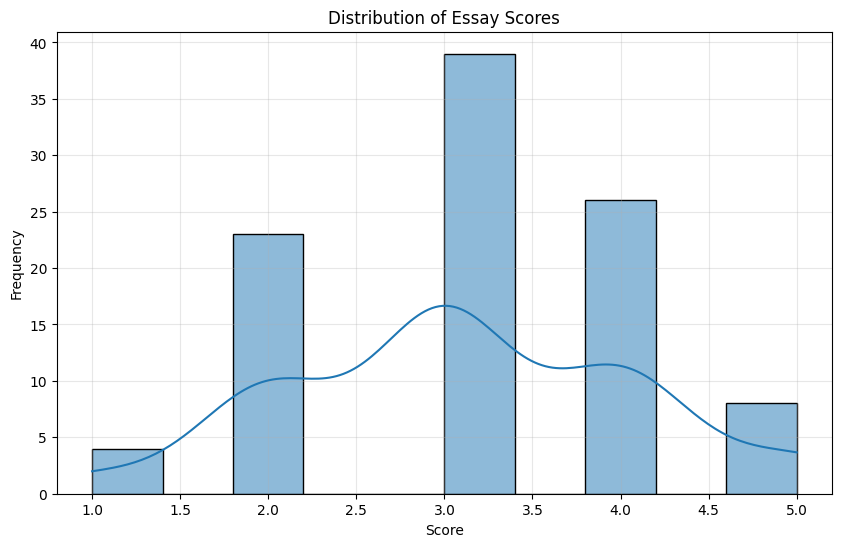

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=10)
plt.title('Distribution of Essay Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
def preprocess_text(text):
    """
    Function to clean and preprocess essay text
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', ' ', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenize text
        tokens = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # Join tokens back into text
        return ' '.join(tokens)
    else:
        return ""



In [11]:
# Apply preprocessing to essays
df['processed_essay'] = df['essay_text'].apply(preprocess_text)
print("First few processed essays:")
display(df[['essay_text', 'processed_essay']].head())


First few processed essays:


,essay_text,processed_essay
0,Technology is a significant subject in our mod...,technology significant subject modern world mu...
1,Education is a significant subject in our mode...,education significant subject modern world mul...
2,The topic of technology has several points to ...,topic technology several points consider discu...
3,The multifaceted nature of environment present...,multifaceted nature environment presents compe...
4,"In contemporary society, technology represents...",contemporary society technology represents cru...


### Feature engineering


In [13]:
def extract_text_features(essay):
    """
    Extract linguistic features from an essay
    """
    if isinstance(essay, str):
        # Number of characters
        num_chars = len(essay)
        
        # Number of words
        words = word_tokenize(essay)
        num_words = len(words# Cell 7: Extract features from essays
features = df['essay_text'].apply(extract_text_features)
features_df = pd.DataFrame(features.tolist())
print("Engineered features:")
display(features_df.head())

        
        # Average word length
        avg_word_length = sum(len(word) for word in words) / max(num_words, 1)
        
        # Number of sentences
        sentences = sent_tokenize(essay)
        num_sentences = len(sentences)
        
        # Average sentence length
        avg_sentence_length = num_words / max(num_sentences, 1)
        
        # Lexical diversity (unique words / total words)
        lexical_diversity = len(set(words)) / max(num_words, 1)
        
        return {
            'num_chars': num_chars,
            'num_words': num_words,
            'avg_word_length': avg_word_length,
            'num_sentences': num_sentences,
            'avg_sentence_length': avg_sentence_length,
            'lexical_diversity': lexical_diversity
        }
    else:
        return {
            'num_chars': 0,
            'num_words': 0,
            'avg_word_length': 0,
            'num_sentences': 0,
            'avg_sentence_length': 0,
            'lexical_diversity': 0
        }


In [14]:
# Extract features from essays
features = df['essay_text'].apply(extract_text_features)
features_df = pd.DataFrame(features.tolist())
print("Engineered features:")
display(features_df.head())


Engineered features:


,num_chars,num_words,avg_word_length,num_sentences,avg_sentence_length,lexical_diversity
0,1142,161,6.180124,13,12.384615,0.409938
1,1133,161,6.124224,13,12.384615,0.409938
2,577,98,5.010204,10,9.800000,0.561224
3,3889,490,6.995918,22,22.272727,0.310204
4,1825,235,6.834043,16,14.687500,0.391489


In [15]:
#Combine features with original dataframe
df_combined = pd.concat([df, features_df], axis=1)
print("Combined dataframe:")
display(df_combined.head())


Combined dataframe:


,essay_text,score,topic,processed_essay,num_chars,num_words,avg_word_length,num_sentences,avg_sentence_length,lexical_diversity
0,Technology is a significant subject in our mod...,3,technology,technology significant subject modern world mu...,1142,161,6.180124,13,12.384615,0.409938
1,Education is a significant subject in our mode...,3,education,education significant subject modern world mul...,1133,161,6.124224,13,12.384615,0.409938
2,The topic of technology has several points to ...,2,technology,topic technology several points consider discu...,577,98,5.010204,10,9.800000,0.561224
3,The multifaceted nature of environment present...,5,environment,multifaceted nature environment presents compe...,3889,490,6.995918,22,22.272727,0.310204
4,"In contemporary society, technology represents...",4,technology,contemporary society technology represents cru...,1825,235,6.834043,16,14.687500,0.391489


### Feature correlation with score

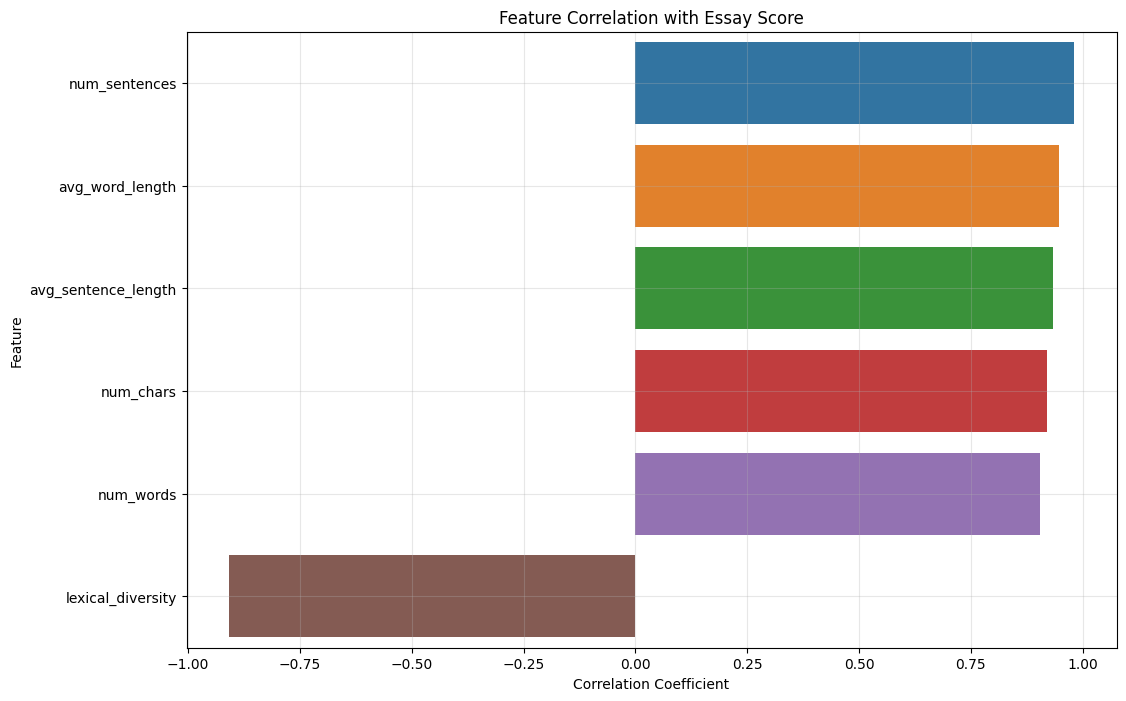

In [16]:

plt.figure(figsize=(12, 8))
feature_cols = features_df.columns
correlation_data = pd.DataFrame({
    'Feature': feature_cols,
    'Correlation': [df_combined[col].corr(df_combined['score']) for col in feature_cols]
})
correlation_data = correlation_data.sort_values('Correlation', ascending=False)

sns.barplot(x='Correlation', y='Feature', data=correlation_data)
plt.title('Feature Correlation with Essay Score')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.show()


In [17]:
#Text vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.85
)
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_essay'])
print(f"TF-IDF features shape: {tfidf_features.shape}")


TF-IDF features shape: (100, 243)


### Prepare features : combine TF-IDF features with engineered features


In [18]:
X_tfidf = tfidf_features.toarray()
X_engineered = features_df.values
X = np.hstack([X_tfidf, X_engineered])
y = df['score'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (80, 249)
Testing set shape: (20, 249)


### Train a Linear Regression model

In [19]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression Results:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")



Linear Regression Results:
Training RMSE: 0.0000
Testing RMSE: 0.0001
Training MAE: 0.0000
Testing MAE: 0.0000
Training R²: 1.0000
Testing R²: 1.0000


### Train a Ridge Regression model

In [20]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"\nRidge Regression Results:")
print(f"Training RMSE: {train_rmse_ridge:.4f}")
print(f"Testing RMSE: {test_rmse_ridge:.4f}")
print(f"Training MAE: {train_mae_ridge:.4f}")
print(f"Testing MAE: {test_mae_ridge:.4f}")
print(f"Training R²: {train_r2_ridge:.4f}")
print(f"Testing R²: {test_r2_ridge:.4f}")



Ridge Regression Results:
Training RMSE: 0.0095
Testing RMSE: 0.0043
Training MAE: 0.0064
Testing MAE: 0.0038
Training R²: 0.9999
Testing R²: 1.0000


### Train a Random Forest model


In [21]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Testing RMSE: {test_rmse_rf:.4f}")
print(f"Training MAE: {train_mae_rf:.4f}")
print(f"Testing MAE: {test_mae_rf:.4f}")
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Testing R²: {test_r2_rf:.4f}")



Random Forest Results:
Training RMSE: 0.0071
Testing RMSE: 0.0039
Training MAE: 0.0020
Testing MAE: 0.0015
Training R²: 0.9999
Testing R²: 1.0000


### Compare model performances


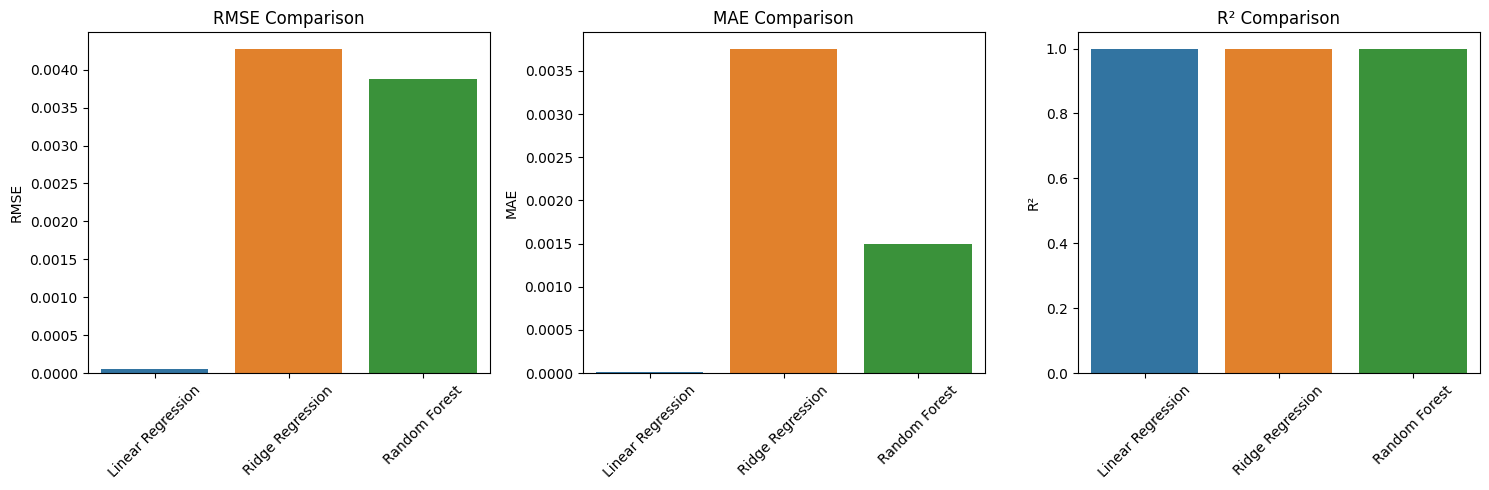

In [22]:
models = ['Linear Regression', 'Ridge Regression', 'Random Forest']
rmse_values = [test_rmse, test_rmse_ridge, test_rmse_rf]
mae_values = [test_mae, test_mae_ridge, test_mae_rf]
r2_values = [test_r2, test_r2_ridge, test_r2_rf]

plt.figure(figsize=(15, 5))

# RMSE comparison
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=rmse_values)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# MAE comparison
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mae_values)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# R² comparison
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title('R² Comparison')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###  predict score for a new essay


In [23]:
def predict_essay_score(essay_text, model, tfidf_vectorizer):
    """
    Predict the score for a new essay
    """
    # Preprocess the essay
    processed_essay = preprocess_text(essay_text)
    
    # Extract engineered features
    engineered_features = extract_text_features(essay_text)
    engineered_features_array = np.array(list(engineered_features.values())).reshape(1, -1)
    
    # Extract TF-IDF features
    tfidf_features = tfidf_vectorizer.transform([processed_essay]).toarray()
    
    # Combine features
    X_combined = np.hstack([tfidf_features, engineered_features_array])
    
    # Predict score
    predicted_score = model.predict(X_combined)[0]
    
    return predicted_score


In [33]:
# Test the prediction function with a sample essay
sample_essay = """
Education is the foundation of modern society empowers individuals with knowledge and skills that are essential for personal growth and professional development. Quality education enables people to think critically, solve complex problems, and make informed decisions. Moreover, education promotes social mobility, reduces inequality, and fosters economic growth. In today's rapidly changing world, access to education is more important than ever as it prepares individuals to adapt to new technologies and challenges. Therefore, governments, communities, and individuals must prioritize investments in education to build a better future for all.
"""

predicted_score = predict_essay_score(sample_essay, rf_model, tfidf_vectorizer)
print(f"Predicted score for the sample essay: {predicted_score:.2f}")



Predicted score for the sample essay: 1.86


In [36]:
# Test the prediction function with a sample essay
sample_essay = """
In contemporary society, education represents a crucial domain that merits thorough examination. The complexities of education encompass various dimensions that influence our daily lives."""
""
predicted_score = predict_essay_score(sample_essay, rf_model, tfidf_vectorizer)
print(f"Predicted score for the sample essay: {predicted_score:.2f}")



Predicted score for the sample essay: 2.24


In [37]:
# Test the prediction function with a sample essay
sample_essay = """
One critical dimension of healthcare relates to medical. A comprehensive examination of healthcare requires acknowledging the intersection of multiple theoretical frameworks that collectively illuminate its significance. Empirical evidence suggests that healthcare functions as a catalyst for structural changes within established systems, simultaneously disrupting conventional practices while creating opportunities for advancement. This dialectical relationship between tradition and innovation characterizes the evolution of healthcare within contemporary discourse, prompting scholars to reconsider fundamental assumptions that have historically dominated the field. Studies have demonstrated that medical significantly influences outcomes in healthcare, with implications for both theoretical understanding and practical applications. The interrelationship between medical and broader elements of healthcare creates a complex network of factors that must be considered holistically.

"""

predicted_score = predict_essay_score(sample_essay, rf_model, tfidf_vectorizer)
print(f"Predicted score for the sample essay: {predicted_score:.2f}")



Predicted score for the sample essay: 3.26
